# Dimensionality Reduction

## Introduction

>Finding meaning in data, particularly high-dimensional data, is one of the challenges in ML. As a solution, **dimensionality-reduction** techniques, which are a set of techniques that reduce the number of features in data, can be valuable. 

## Benefits of Dimensionality Reduction

- It enables the visualisation of high-dimensionality datasets by lowering the data dimension to two or three dimensions. 
- It allows us to reduce the number of features in the data: when working with data that has many features (including NLP problems), dimensionality reduction enables us to significantly reduce the number of model parameters that require optimisation, which can save time and data (although in some cases, this comes at the cost of feature interpretability).

## Principal Component Analysis (PCA)

In this notebook, we will explore PCA, a dimensionality-reduction technique. This technique involves linearly transforming the normalised dataset such that it varies mostly in the directions of its axes, which are then known as the **principal components** of the data. Thus, the most important information (that of the greatest variation) is captured along the first principal component of the data; the second most important, along the second principal component; the third, along the third component; and so on. As such, the less important information, which lies along higher principal components, can be discarded by ignoring the values of the data that lie in that direction. Mathematically, this is a projection onto the lower dimensional space spanned by the more important principal components.

The process of performing PCA is *relatively* simple. There are a couple of ways to implement PCA; however, we will focus on the covariance approach here. You must understand two concepts to be able to implement a PCA algorithm: covariance and eigen things (eigenvectors and eigenvalues). Covariance allows us to capture the relationships between different variables, whilst eigen things allow us to quantify the magnitude and direction of the spread of matrices/data.

### Covariance

![](https://www.statisticshowto.com/wp-content/uploads/2013/12/g-covariance.gif)
([Source](https://www.statisticshowto.com/covariance/)) 

Here, we learn how to capture the most important information. If we had a 3D input space, but all the data points lay at the same height above the x-y plane, then it would be apparent that the z-axis values of each of the datapoints could be discarded. This is not because the z-values take any particular value, but because they have zero **variance**. Variance is the mean of the square differences of the feature from the features' mean:

$$
Var(x) = \sigma^2 = \frac{\sum_i^m (x_i - \mu)^2}{m}
$$

In more than one dimensional space, data variance is characterised by a **covariance matrix**, whereas the variance averagely characterises the degree of variation of the feature from its mean. The covariance matrix defines the combined variation degree of the features. If, as one feature positively increases away from its mean, another feature also increases positively from its mean, then those two features will have a positive covariance. The formula for the covariance essentially makes each element a linear combination of the distances of one feature from its mean, weighted by the same for another feature. As long as we scale (subtract the mean and divide by range/s.d) each feature first, the covariance matrix can be computed as $X^T X$. Since the product of the scaled features commutes, the covariance matrix is symmetric.

$$
Cov(X) = \Sigma = \frac{1}{m} \begin{bmatrix} \Sigma (x_1 - \mu_1)^2 & \dots & \Sigma (x_1 - \mu_1)(x_n - \mu_n)\\ \vdots & \ddots & \vdots \\\Sigma (x_n - \mu_n)(x_1 - \mu_1) & \dots & \Sigma (x_n - \mu_n)^2  \\ \end{bmatrix} = X^T X \in R^{n \times n}
$$

- Positive covariance: features vary in the same direction together (positively correlated).
- Negative covariance: features vary in opposite directions together (negatively correlated).
- (Near) Zero covariance: features are uncorrelated.

### Eigen-Stuff
An eigenvector is a vector that does not change direction after a linear transformation is applied to it. In the image below, we have transformed three vectors by scaling them with factors of 2 and 0.5 in the horizontal and vertical directions, respectively. The transformation matrix is, thus, given by $\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$.
![](https://www.visiondummy.com/wp-content/uploads/2014/03/eigenvectors.png)

We see in the above image that the direction of the **eigenvectors** (those in red) does not change when a linear transformation is applied to them. All other vectors, however, do. Mathematically, vector $\overrightarrow{v}$ is scaled by a transformation matrix, $A$. Thus, $\overrightarrow{v'} = A\overrightarrow{v}$. For an arbitrary transformation matrix, the eigenvectors and eigenvalues are defined by the following formula:
$$
A\overrightarrow{v} = \lambda\overrightarrow{v}
$$

$\lambda$ is a scalar that specifies the **eigenvalue**. Any solution for the above equation, given $A$, will require $\lambda$. Note that eigenvalues do not take on the value of 0 as this is a trivial solution.

The covariance matrix can be thought of as a transformation of the n-dimensional space (as it is a function of each of the features) and is characterised by its eigenvectors, which define how the transformation stretches the space. The space is stretched the most by a factor of the largest eigenvalue and the least by a factor of the smallest eigenvalue. All points in space, which do not lie along the corresponding eigenvectors are scaled by a factor between these two eigenvalues. Since it is symmetric, the covariance matrix has orthogonal eigenvectors (a property of a rotation), although the eigenvectors are not of unit length. Therefore, the transformation also stretches the space in directions and degrees corresponding to these eigenvectors.

### Implementing PCA

Regarding PCA implementation, it is relatively straightforward:
- Standardise the data.
- Calculate the covariance matrix.
- Calculate the eigenvectors and eigenvalues.
- Reduce the dimensionality.
  - Truncate the eigenvectors to your chosen number of dimensionality.
  - Matrix multiply your truncated eigenvectors by your standardised matrix.
- Plot (If you have chosen a dimensionality less than 3).

Compressing data using PCA looks like these:
<img src='images/pcafigs1.png'>
<img src='images/pcafigs2.png'>

## The Code

In [1]:
import numpy as np      # effective math
import matplotlib.pyplot as plt     # ultimate plotting tool
from mpl_toolkits.mplot3d import Axes3D     # 3D plots
import pandas as pd     # allow us to make dataframes to store our data cleanly
from sklearn import datasets

In [2]:
data = pd.read_csv('../DATA/iris.csv')

label_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}  # dictionary containing label to number mapping
data["variety"] = data["variety"].replace(label_dict)

X = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
Y = data["variety"]

print(X.shape)      # 150 rows (datapoints), 4 columns (features)
print(Y.shape)      # 150 single dimension labels

m = X.shape[0]      # 150 rows

data

(150, 4)
(150,)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


To compute the covariance matrix from $X^TX$, we must scale the features:

In [3]:
def standardise(x):
    """Centre around the mean and divide by range to put all features on a similar scale"""
    ## Standardise the data
  
X_std = standardise(X)    # centre the data around mean and divide by range/s.d
X_std

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Now, we find the covariance of the dataset and its eigenvalues and eigenvectors.

In [4]:
def decompose(x):
    """Compute the covariance matrix of the data and find its eigen properties"""
    ## Compute the Covariance matrix

    ## Compute the eigenstuff
   
    return eig_vals, eig_vecs, cov

X_std = np.array(X_std)
eig_vals, eig_vecs, covariance = decompose(X_std)      # compute the covariance matrix and find its characteristics


Covariance matrix
[[150.         -17.63546762 130.76306638 122.69116894]
 [-17.63546762 150.         -64.26601565 -54.91888988]
 [130.76306638 -64.26601565 150.         144.42981471]
 [122.69116894 -54.91888988 144.42981471 150.        ]]

Eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues
[437.77467248 137.10457072  22.01353134   3.10722546]


We can visualise the contribution of each eigenvector to the variance of the data by comparing their eigenvectors. The eigenvalues define the degree to which each eigenvector has scaled the space, which corresponds to the variance of the data in each orthogonal direction. The eigenvectors with high eigenvalues correspond to the directions in which the data vary significantly, and hence, they contain more information. We will exclude the less important eigenvectors to reduce the dimensionality of the data.

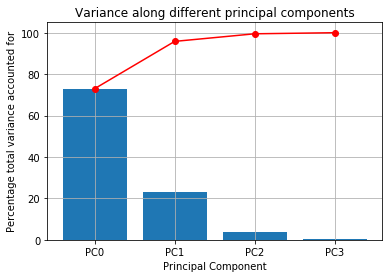

In [5]:
def whicheigs(eig_vals):
    """"Plot the variance accounted for by each eigenvector and their cummulative sum"""
    total = sum(eig_vals)   # sum up the eigenvalues to compare each one to the total to determine their importance
    var_percent = [(i/total) * 100 for i in eig_vals]   # calculate the percentage variance of the data which this eigenvalue accounts for
    cum_var_percent = np.cumsum(var_percent)    # create a vector of the cumulative sum of the variance percentages

    fig = plt.figure()      # make a figure
    ax =  fig.add_subplot(111)      # add an axis
    plt.title('Variance along different principal components')
    ax.grid()
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage total variance accounted for')

    ax.plot(cum_var_percent, '-ro')     # plot the cummulative sum of the variances accounted for by each eigenvector
    ax.bar(range(len(eig_vals)), var_percent) # position, height # show how much variance the individual eig accounts for
    plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))  # set the xticks to 'PC1' etc
    plt.show()  # show the figure
    
whicheigs(eig_vals)     # visualise the variance of the data for each eigenvector of the covariance matrix

Now, using the matrix of eigenvectors which we returned above, we can exclude the less important vectors (the end columns) and rotate the dataset such that these become the axes that describe it.

In [6]:
def reduce(x, eig_vecs, dims):
    """reduce the number of dimensions of our data by transforming by the truncated matrix of covariance eigenvectors"""
    W = eig_vecs[:, :dims]
    print('\nDimension reducing matrix')
    print(W)
    return np.matmul(x, W), W

dim = 2
X_reduced, transform = reduce(X_std, eig_vecs, dim)     # transform our data into a lower dimension

print(X_reduced.shape)
print(transform.shape)


Dimension reducing matrix
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]
(150, 2)
(4, 2)


Having transformed the dataset to have a lower dimension, we can visualise it.

C:\Users\Nihir\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


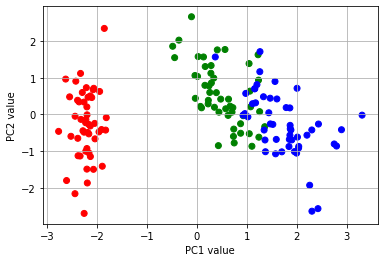

In [7]:
colour_dict = {0:'r', 1:'g', 2:'b'}     # map labels to colours for plotting
colour_list = [colour_dict[i] for i in list(Y)]     # generator to give the list of colours corresponding to each class

def plotreduced(x, dim):
    """Plot the data that have been transformed to have a visualisable dimension"""
    fig = plt.figure()      # make a figure
    plt.grid()
    if dim == 3:
        ax = fig.add_subplot(111, projection='3d')      # add a 3D set of axes
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colour_list)    # scatter plot the 3D data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
        ax.set_zlabel('PC3 value')
    elif dim == 2:
        ax = fig.add_subplot(111)      # add a 2D set of axes
        ax.scatter(x[:, 0], x[:, 1], c=colour_list)    # scatter plot the 3D data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
    elif dim == 1:
        ax = fig.add_subplot(111)       # add a 2D axis
        ax.scatter(x, np.zeros_like(x), c=colour_list)      # plot the 1D data along the x axis (zero for each y value)
        plt.xlabel('PC1 Value')
    plt.show()
    return ax

ax = plotreduced(X_reduced, dim)      # check out how the data looks in a visualisable dimension

## t-SNE

Whilst PCA can be used for dimensionality reduction and visualisation, one particularly recent algorithm has seen a rise in popularity for data visualisation. This algorithm is [t-SNE](https://www.semanticscholar.org/paper/Visualizing-Data-using-t-SNE-Maaten-Hinton/1c46943103bd7b7a2c7be86859995a4144d1938b), which stands for 't-distributed stochastic neighbour embedding'. The math behind the algorithm is out of the scope of this course. However, intuitively, the algorithm has two steps: 
- Firstly, create a probability distribution for every point in the dataset such that other similar points are assigned a higher probability, and conversely, less similar points are assigned a lower probability. 
- Secondly, the original data are randomly projected onto a low-dimensional plane (2D or 3D). The algorithm constructs another set of probability distributions for each point in this low-dimensional plane, and using the high-dimensional set of probability distributions, it attempts to minimise the Kullback-Leibler divergence of the two by shifting around the points in the low-dimensional plane.

Note that the t-SNE algorithm is non-linear, whereas PCA is linear. This means that t-SNE can model more complex relationships between features than PCA can. To gain some insights into the capabilities of t-SNE, check [this brilliant resource](https://distill.pub/2016/misread-tsne/).

We will implement [t-SNE on a dataset using the sklearn module](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). For more information on effective usage, visit [sklearn's user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne).

C:\Users\Nihir\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


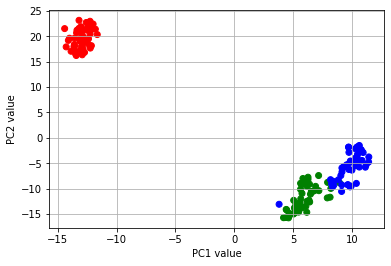

In [13]:
from sklearn.manifold import TSNE

dim = 2
X_tsne = TSNE(n_components=dim).fit_transform(X)
ax = plotreduced(X_tsne, dim)

## Conclusion
At this point, you should have a good understanding of

- dimensionality reduction.
- PCA, covariance and eigen-stuff.
- t-SNE.